**<h1 align="center">Risk Game</h1>**

# <h1 align="center">Assignment 5</h1>

## <h1 align="center">By Sharon Curley</h1>

***

### About the Assignment
***
The assignment is to write a program (or notebook) which simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.
Here are the main sections of the assignment.

1. Import Libraries
2. Rules of Risk
3. The Game
4. Plot the Results
5. References

### 1. Import the Libraries
***

I import the following libraries to plot the dataset.

- `matplotlib.pyplot`: Essential for creating static, animated, and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.
- `numpy`: It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.
- `pandas`: Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 2. Rules of Risk
***

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

- The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
  - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
- The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
  - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


### 3. The Game
***

In [ ]:
# Define a function to simulate a single battle round
def simulate_battle_round():
    # Roll dice for attacker and defender
    attacker_rolls = sorted(np.random.randint(1, 7, 3), reverse=True)
    defender_rolls = sorted(np.random.randint(1, 7, 2), reverse=True)
    
    # Compare dice and determine troop losses
    attacker_losses = 0
    defender_losses = 0
    
    # First comparison (top dice)
    if attacker_rolls[0] <= defender_rolls[0]:
        attacker_losses += 1
    else:
        defender_losses += 1
    
    # Second comparison (second highest dice)
    if attacker_rolls[1] <= defender_rolls[1]:
        attacker_losses += 1
    else:
        defender_losses += 1
    
    return attacker_losses, defender_losses, attacker_rolls, defender_rolls

# Simulate 1000 battle rounds and collect results
num_rounds = 1000
attacker_losses = []
defender_losses = []
all_attacker_rolls = []
all_defender_rolls = []

for _ in range(num_rounds):
    a_loss, d_loss, a_rolls, d_rolls = simulate_battle_round()
    attacker_losses.append(a_loss)
    defender_losses.append(d_loss)
    all_attacker_rolls.append(a_rolls)
    all_defender_rolls.append(d_rolls)
    
# Optionally, print the first few rounds' dice rolls and losses
rounds_to_print = min(10, len(all_attacker_rolls))  # Print up to 10 rounds, or fewer if not available
print(f"\nFirst {rounds_to_print} rounds' dice rolls and losses:")
for i in range(rounds_to_print):  # Adjust the range if you want to see more or fewer rounds
    print(f"Round {i+1}:")
    print(f"  Attacker Rolls: {all_attacker_rolls[i]}, Defender Rolls: {all_defender_rolls[i]}")
    print(f"  Attacker Losses: {attacker_losses[i]}, Defender Losses: {defender_losses[i]}")
    print()


First 10 rounds' dice rolls and losses:
Round 1:
  Attacker Rolls: [3, 3, 3], Defender Rolls: [2, 1]
  Attacker Losses: 0, Defender Losses: 2

Round 2:
  Attacker Rolls: [4, 2, 1], Defender Rolls: [6, 5]
  Attacker Losses: 2, Defender Losses: 0

Round 3:
  Attacker Rolls: [5, 5, 2], Defender Rolls: [6, 6]
  Attacker Losses: 2, Defender Losses: 0

Round 4:
  Attacker Rolls: [6, 4, 2], Defender Rolls: [4, 1]
  Attacker Losses: 0, Defender Losses: 2

Round 5:
  Attacker Rolls: [6, 4, 2], Defender Rolls: [6, 2]
  Attacker Losses: 1, Defender Losses: 1

Round 6:
  Attacker Rolls: [6, 6, 2], Defender Rolls: [6, 3]
  Attacker Losses: 1, Defender Losses: 1

Round 7:
  Attacker Rolls: [4, 3, 2], Defender Rolls: [3, 2]
  Attacker Losses: 0, Defender Losses: 2

Round 8:
  Attacker Rolls: [3, 2, 1], Defender Rolls: [4, 1]
  Attacker Losses: 1, Defender Losses: 1

Round 9:
  Attacker Rolls: [6, 4, 1], Defender Rolls: [3, 1]
  Attacker Losses: 0, Defender Losses: 2

Round 10:
  Attacker Rolls: [6, 

### 4. Plot the Results
***

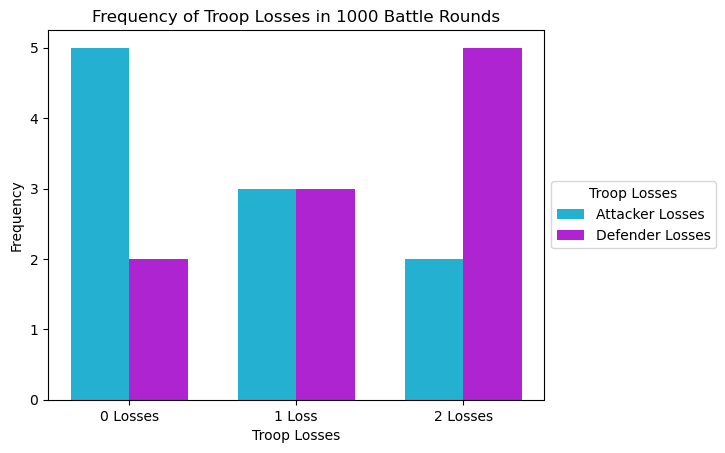

In [20]:
# Count the occurrences of each troop loss outcome
attacker_loss_counts = [attacker_losses.count(i) for i in range(3)]
defender_loss_counts = [defender_losses.count(i) for i in range(3)]

# Plotting results: Side-by-Side Bar Chart
labels = ['0 Losses', '1 Loss', '2 Losses']
x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, attacker_loss_counts, width, label='Attacker Losses', color='#24b1d1')
bars2 = ax.bar(x + width/2, defender_loss_counts, width, label='Defender Losses', color='#ae24d1')

# Total cumulative losses for each side
total_attacker_losses = sum(attacker_losses)
total_defender_losses = sum(defender_losses)
#print("Total Attacker Losses:", total_attacker_losses)
#print("Total Defender Losses:", total_defender_losses)

# Detailed counts of losses (0, 1, or 2 losses per round)
attacker_loss_counts = [attacker_losses.count(i) for i in range(3)]
defender_loss_counts = [defender_losses.count(i) for i in range(3)]

# Labeling
ax.set_xlabel('Troop Losses')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Troop Losses in 1000 Battle Rounds')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title="Troop Losses",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

# Display the chart
plt.show()

### 5. References
***

1. Week 5 Lecture Notebooks - Numpy and Random

2. Code Review-Stack Exchange - code without random - https://codereview.stackexchange.com/questions/249260/python-risk-game

3. numpy.random.randint - https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html 

4. w3schools - NumPy Sorting Arrays - https://www.w3schools.com/python/numpy/numpy_array_sort.asp

5. Efficiently sorting a numpy array in descending order - https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order
Note to myself: attacker[::-1].sort() sorts the array in place, whereas a=np.sort(attacker)[::-1] creates a new array.    

6.

7.

8.

9.

10.

11.

12. Stacked Bar Charts with Labels in Matplotlib: https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/

